In [5]:
import pandas as pd

# load data
churn = pd.read_csv("churn.csv")

In [6]:
churn.head()

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED
0,0,5.24640,7.51510,86.32780,0,CH,FreeLocal,Standard,57,F,M,2,27535.3,Y,Vol
1,3,0.00000,0.00000,3.94229,0,CC,Budget,Intnl_discount,50,F,S,2,64632.3,N,InVol
2,4,5.55564,0.00000,9.36347,1,CC,Budget,Intnl_discount,68,F,M,2,81000.9,N,Vol
3,8,14.01930,5.68043,29.80650,0,CC,Budget,Standard,34,M,S,0,87467.1,Y,Current
4,10,13.66400,2.95642,32.63810,0,CC,FreeLocal,Intnl_discount,60,M,M,2,83220.6,N,Vol


In [8]:
# select predictors
X = churn[['LOCAL','LONGDIST','International']]

In [9]:
X.head()

,LOCAL,LONGDIST,International
0,86.32780,5.24640,7.51510
1,3.94229,0.00000,0.00000
2,9.36347,5.55564,0.00000
3,29.80650,14.01930,5.68043
4,32.63810,13.66400,2.95642


In [12]:
# select the target
Y=churn[['CHURNED']]

In [13]:
Y.head()

,CHURNED
0,Vol
1,InVol
2,Vol
3,Current
4,Vol


In [14]:
# import the library
from sklearn.tree import DecisionTreeClassifier

# initialize the algorithm
dtree=DecisionTreeClassifier()

# train a model 
dtree.fit(X,Y)

DecisionTreeClassifier()

In [16]:
new_data = pd.DataFrame(columns=['LOCAL','LONGDIST' , 'International'], data=[[85,0,0]])
dtree.predict(new_data)

array(['Current'], dtype=object)

In [17]:
dtree.predict_proba(new_data)

array([[1., 0., 0.]])

In [19]:
# load the required library
from sklearn.model_selection import train_test_split

# split data into training (70%) and testing (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [20]:
# initialize the algorithm
dtree=DecisionTreeClassifier()

# Generate a new model using training data only
dtree.fit(X_train,Y_train)

# predict the test data
Y_pred = dtree.predict(X_test)

In [22]:
# load the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

print(accuracy_score(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))  
print(classification_report(y_test, Y_pred)) 
print(dtree.feature_importances_)

0.6261261261261262
[[174   4  75]
 [  3  34   2]
 [ 78   4  70]]
              precision    recall  f1-score   support

     Current       0.68      0.69      0.69       253
       InVol       0.81      0.87      0.84        39
         Vol       0.48      0.46      0.47       152

    accuracy                           0.63       444
   macro avg       0.66      0.67      0.66       444
weighted avg       0.62      0.63      0.62       444

[0.54172406 0.31420325 0.14407269]


[Text(184.07209369094855, 214.57894736842104, 'LOCAL <= 4.988\ngini = 0.556\nsamples = 1033\nvalue = [579, 93, 361]\nclass = Vol'),
 Text(105.05192769488579, 208.85684210526315, 'LOCAL <= 2.536\ngini = 0.327\nsamples = 115\nvalue = [13, 93, 9]\nclass = InVol'),
 Text(90.38603783736204, 203.13473684210527, 'LOCAL <= 0.575\ngini = 0.443\nsamples = 64\nvalue = [10, 46, 8]\nclass = InVol'),
 Text(88.12974709005069, 197.41263157894736, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]\nclass = InVol'),
 Text(92.64232858467338, 197.41263157894736, 'LOCAL <= 0.678\ngini = 0.499\nsamples = 54\nvalue = [10, 36, 8]\nclass = InVol'),
 Text(88.12974709005069, 191.69052631578947, 'LOCAL <= 0.616\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Current'),
 Text(85.87345634273935, 185.96842105263158, 'LOCAL <= 0.596\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = InVol'),
 Text(83.617165595428, 180.24631578947367, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Current'),
 Text(88.1297470

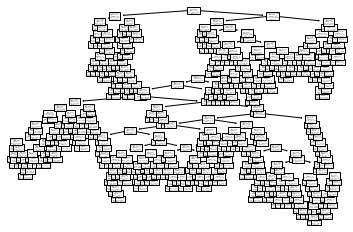

In [23]:
from sklearn import tree

tree.plot_tree(dtree, feature_names = ["LOCAL",'LONGDIST','International'], \
               class_names=['Vol','InVol','Current'])